In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [194]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [195]:
hr_bot_clear = pd.read_json("rzd/ESC_DATASET_v1.2/annotation/hr_bot_clear.json")
hr_bot_noise = pd.read_json("rzd/ESC_DATASET_v1.2/annotation/hr_bot_noise.json")
hr_bot_synt = pd.read_json("rzd/ESC_DATASET_v1.2/annotation/hr_bot_synt.json")
luga = pd.read_json("rzd/ESC_DATASET_v1.2/annotation/luga.json")

# Label Analysis

In [223]:
def get_unique_nums(df, text_start):
    texts = df['text'].to_list()
    unique_nums = {}

    for i in texts:
        if text_start in i:
            num = " ".join(i.split()[2:-1])
            if num in unique_nums.keys():
                unique_nums[num] += 1
            else:
                unique_nums[num] = 1
    return unique_nums

In [224]:
def eda_one_df(df):
    text_starts = ['осадить', 'протянуть']
    for i in text_starts: 
        print(get_unique_nums(df, i))

    count_num_labels = sum(get_unique_nums(df, 'осадить').values()) + sum(get_unique_nums(df, 'протянуть').values())
    print('\n')
    print("количество лейблов с числом:", count_num_labels)
    print("количество лейблов без числа:", df.shape[0] - count_num_labels)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(data=df, x='label', discrete=True, ax=axes[0])
    axes[0].grid(True)

    sns.histplot(data=df, x='attribute', discrete=True, ax=axes[1])
    axes[1].grid(True)

    plt.show()

{'двадцать восемь': 8, 'восемь': 9, 'четыре': 11, 'двадцать шесть': 6, 'три': 10, 'двадцать четыре': 1, 'один': 6, 'одиннадцать': 6, 'девятнадцать': 6, 'девять': 7, 'шестнадцать': 9, 'двенадцать': 14, 'два': 10, 'семь': 9, 'семнадцать': 10, 'двадцать семь': 6, 'тринадцать': 5, 'восемнадцать': 7, 'восемьдесят шесть': 2, 'двадцать девять': 1, 'десять': 11, 'пятнадцать': 7, 'пять': 6, 'шесть': 6, 'четырнадцать': 4, 'восемьдесят два': 2, 'двадцать пять': 2, 'двадцать': 5, 'двадцать два': 1, 'восемьдесят один': 1, 'восемьдесят пять': 1, 'восемьдесят четыре': 1, 'двадцать один': 1, 'восемьдесят три': 1, 'восемьдесят девять': 1}
{'шестнадцать': 8, 'восемь': 5, 'четыре': 5, 'семнадцать': 4, 'семь': 4, 'один': 4, 'пятнадцать': 5, 'двадцать шесть': 5, 'двенадцать': 5, 'девять': 7, 'шесть': 6, 'два': 6, 'двадцать семь': 7, 'четырнадцать': 3, 'три': 6, 'десять': 5, 'тринадцать': 5, 'двадцать восемь': 5, 'двадцать': 2, 'пять': 6, 'восемнадцать': 6, 'двенадцать вагонов': 1, 'двадцать вагонов': 1, 'о

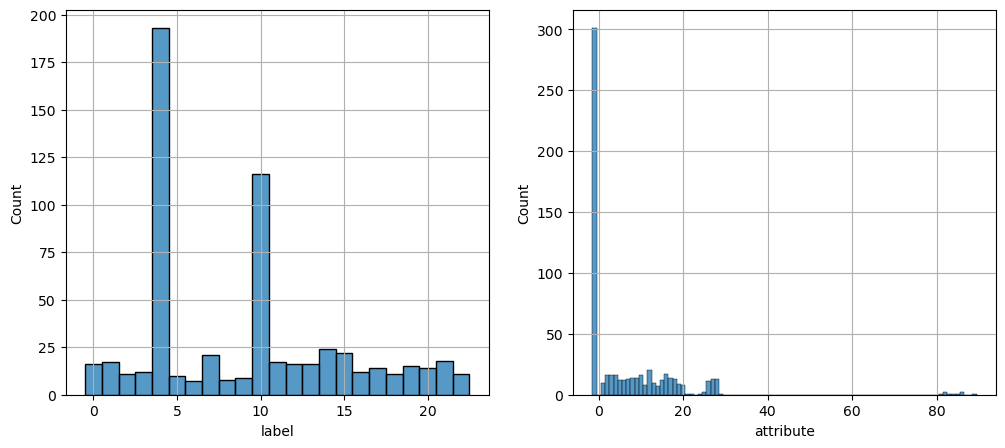

In [225]:
eda_one_df(luga)

# Audio Analysis

In [226]:
import librosa
import librosa.display

In [236]:
def plot_2_wave(path1, path2):
    x_1 , sr_1 = librosa.load(path1)
    x_2 , sr_2 = librosa.load(path2)

    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    

    librosa.display.waveshow(x_1, sr=sr_1, ax=axes[0])
    librosa.display.waveshow(x_2, sr=sr_2, ax=axes[1])

    plt.show()

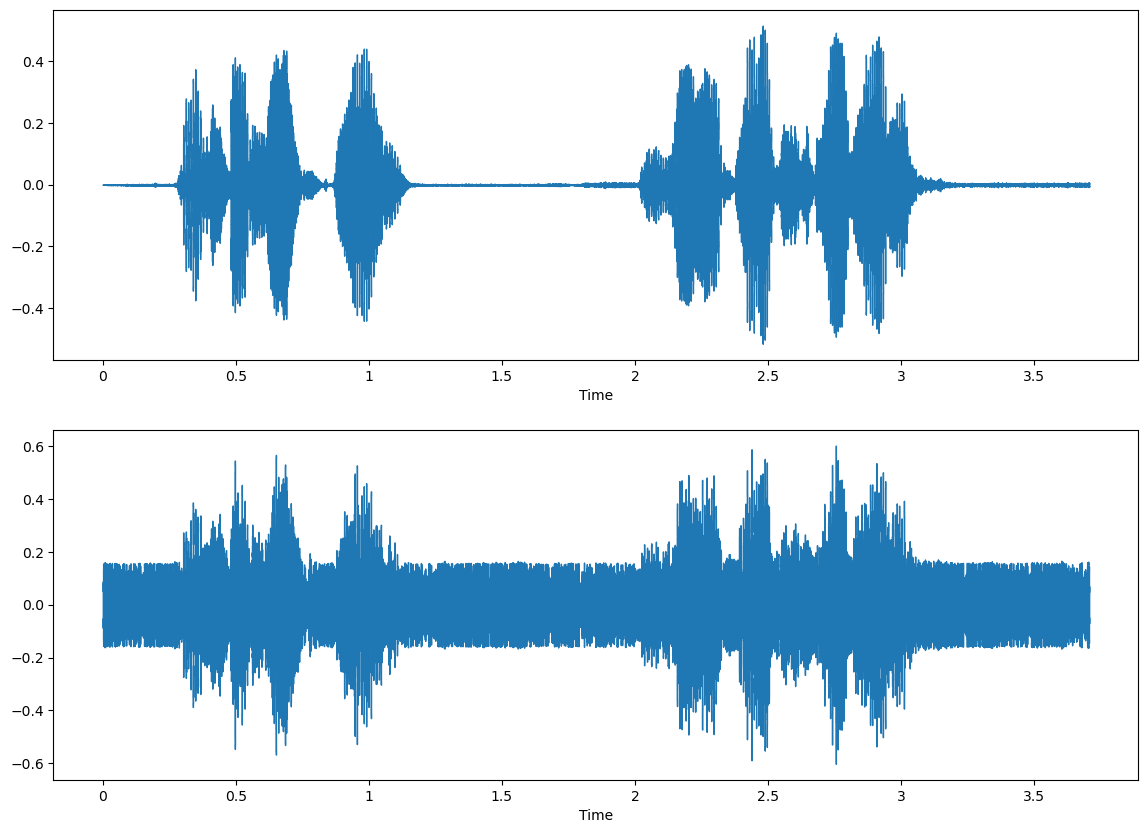

In [266]:
clear = 'rzd/ESC_DATASET_v1.2/hr_bot_clear/3a0cb44f-76ff-11ee-844c-c09bf4619c03.mp3'
noise = 'rzd/ESC_DATASET_v1.2/hr_bot_synt/3a0cb44f-76ff-11ee-844c-c09bf4619c03_1.wav'
luga_audio = 'rzd/ESC_DATASET_v1.2/luga/02_11_2023/2023_11_02__10_32_31.wav'
plot_2_wave(clear, noise)

In [272]:
def plot_2_spectr(path1, path2):
    x_1 , sr_1 = librosa.load(path1)
    X_1 = librosa.stft(x_1)
    Xdb_1 = librosa.amplitude_to_db(abs(X_1))

    x_2 , sr_2 = librosa.load(path2)
    X_2 = librosa.stft(x_2)
    Xdb_2 = librosa.amplitude_to_db(abs(X_2))

    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    librosa.display.specshow(Xdb_1, sr=sr_1, x_axis='time', y_axis='log', ax=axes[0])
    librosa.display.specshow(Xdb_2, sr=sr_2, x_axis='time', y_axis='log', ax=axes[1])
    # plt.colorbar()

    plt.show()

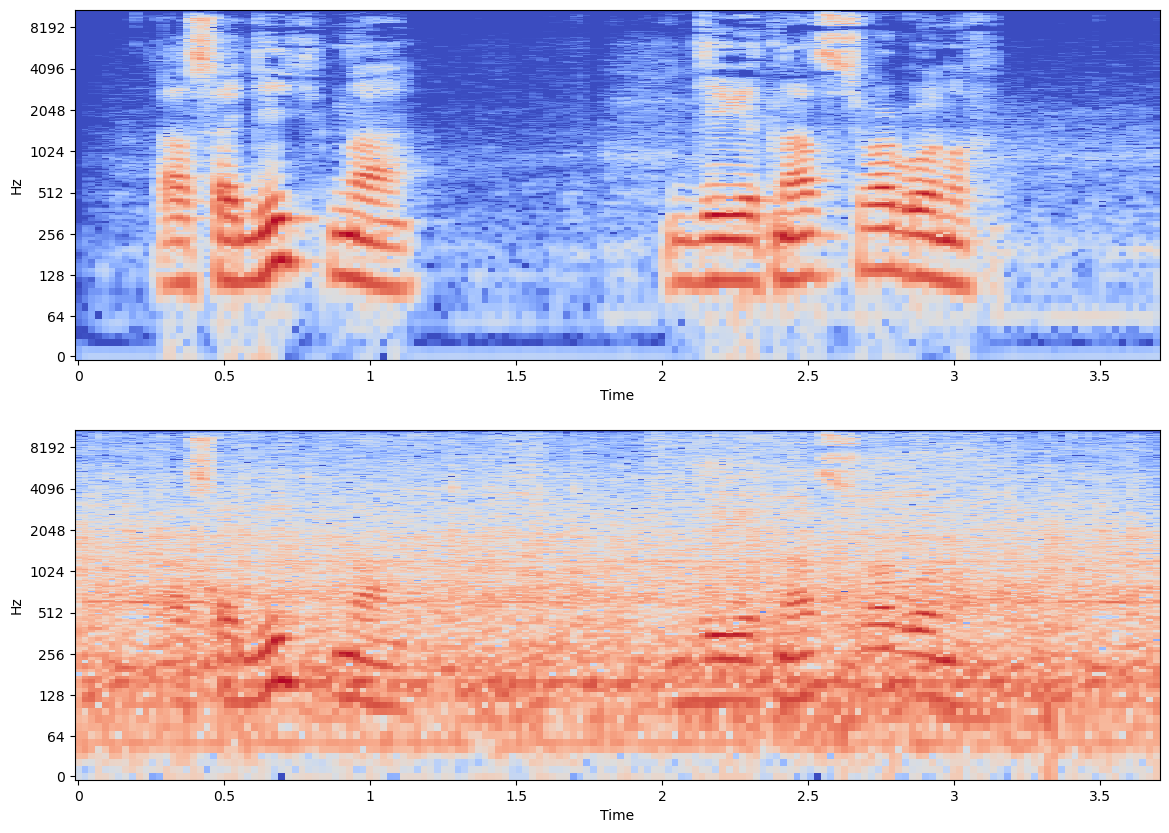

In [275]:
clear = 'rzd/ESC_DATASET_v1.2/hr_bot_clear/3a0cb44f-76ff-11ee-844c-c09bf4619c03.mp3'
noise = 'rzd/ESC_DATASET_v1.2/hr_bot_synt/3a0cb44f-76ff-11ee-844c-c09bf4619c03_1.wav'
plot_2_spectr(clear, noise)


In [255]:
clear = 'rzd/ESC_DATASET_v1.2/hr_bot_clear/3a0cb44f-76ff-11ee-844c-c09bf4619c03.mp3'
noise = 'rzd/ESC_DATASET_v1.2/hr_bot_synt/3a0cb44f-76ff-11ee-844c-c09bf4619c03_1.wav'
x , sr = librosa.load(noise)
x.shape, sr

((81740,), 22050)

In [278]:
import numpy as np
import wave

def read_wav(file_path):
    with wave.open(file_path, 'r') as wav_file:
        params = wav_file.getparams()
        frames = wav_file.readframes(params.nframes)
        signal = np.frombuffer(frames, dtype=np.int16)
    return signal, params.framerate

def compute_fft(signal):
    fft_result = np.fft.fft(signal)
    amplitude = np.abs(fft_result)
    return amplitude

def get_amplitude_from_wav(file_path):
    signal, framerate = librosa.load(file_path)
    amplitude = compute_fft(signal)
    return amplitude

# Пример использования
amplitude_values = get_amplitude_from_wav(clear)
print(amplitude_values.shape)

(81740,)


In [440]:
from scipy.fft import rfft, rfftfreq

noise = 'rzd/ESC_DATASET_v1.2/hr_bot_synt/3a0cb44f-76ff-11ee-844c-c09bf4619c03_1.wav'

x , sr = librosa.load(noise)

yf = rfft(x)
xf = rfftfreq(x.shape[0], 1/sr)

points_per_freq = len(xf) / (sr / 2)

target_idx = int(points_per_freq * 500)
print(target_idx)

1853


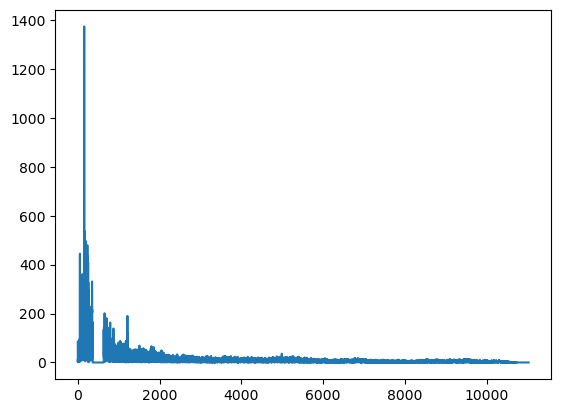

In [441]:
yf[target_idx-500:target_idx+500] = 0

plt.plot(xf, np.abs(yf))
plt.show()

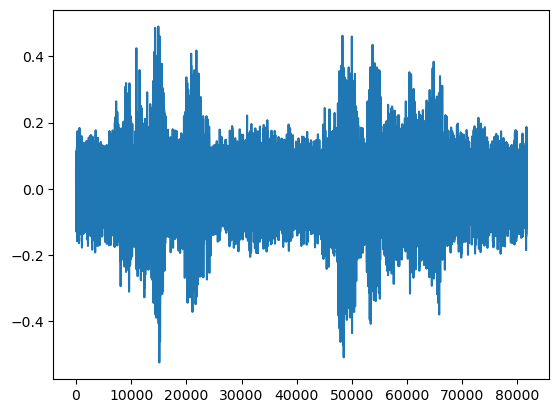

In [442]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig)
plt.show()


# Denoising

In [269]:
from scipy.io import wavfile
import noisereduce as nr
# load data
rate, data = wavfile.read("rzd/ESC_DATASET_v1.2/hr_bot_synt/3a0cb44f-76ff-11ee-844c-c09bf4619c03_1.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)

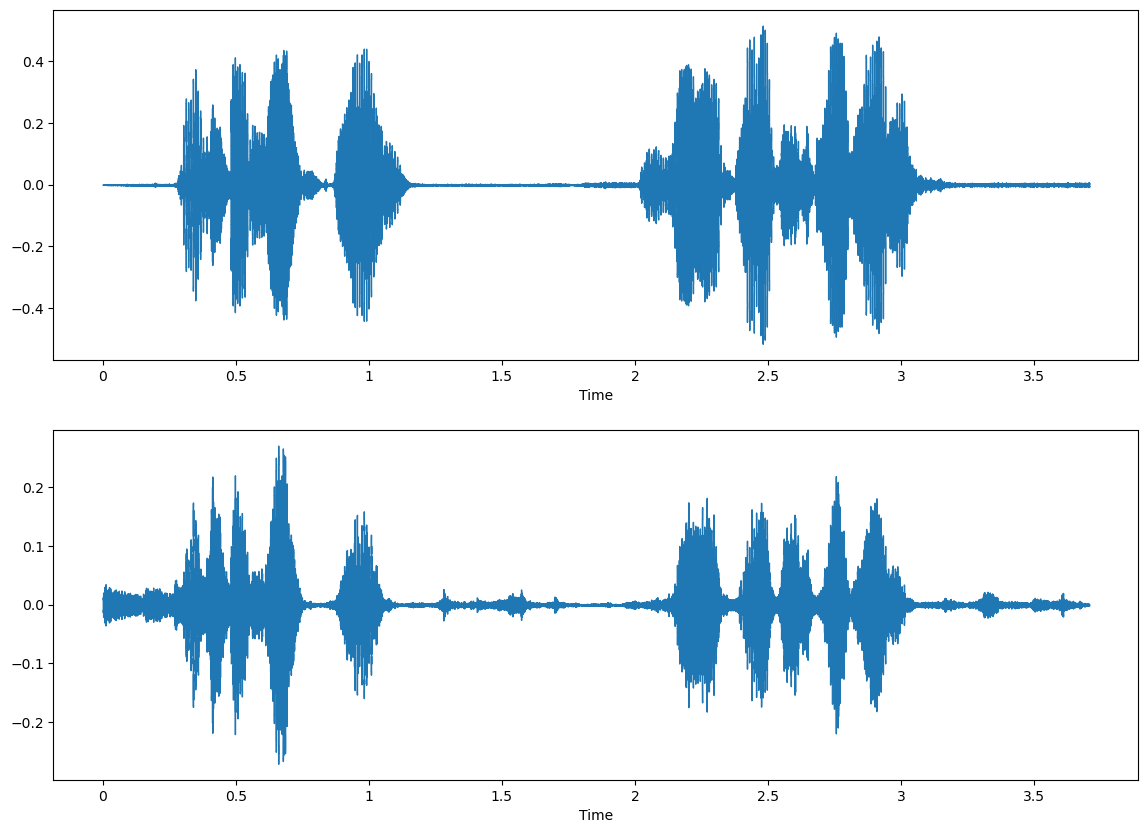

In [281]:
clear = 'rzd/ESC_DATASET_v1.2/hr_bot_clear/3a0cb44f-76ff-11ee-844c-c09bf4619c03.mp3'
denoise = 'mywav_reduced_noise.wav'
luga_audio = 'rzd/ESC_DATASET_v1.2/luga/02_11_2023/2023_11_02__10_32_31.wav'
plot_2_wave(clear, denoise)